<a href="https://colab.research.google.com/github/gabriellaaileen/ADL/blob/main/Tugas_1_ADL_Bab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.1 Multilayer Perceptron**

In [ ]:
!pip install d2l
!pip install matplotlib==3.0.2

# 🌵4.1.2. Activation Function

In [2]:
#%matplotlib inline
import torch
from d2l import torch as d2l

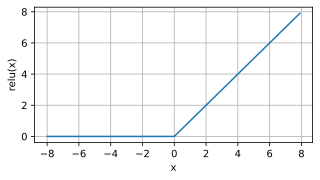

In [3]:
#ReLU Function
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

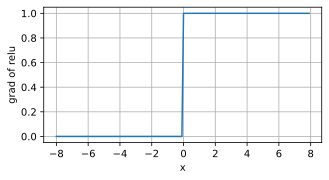

In [4]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

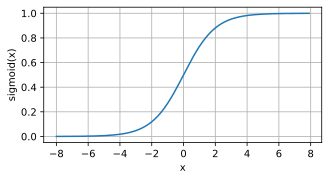

In [5]:
#Sigmoid Function
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

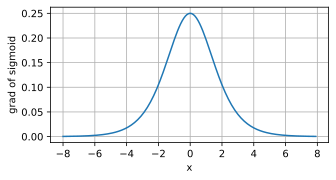

In [6]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

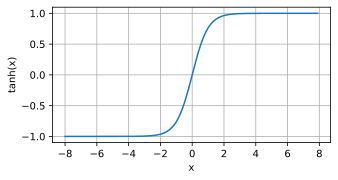

In [7]:
#Tanh Function
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

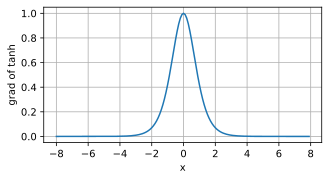

In [8]:
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

# 🌇 4.1.3. Summary
MLP adds one or multiple fully-connected hidden layers between the output and input layers and transforms the output of the hidden layer via an activation function.

Commonly-used activation functions include the ReLU function, the sigmoid function, and the tanh function.

# **4.2 Implementation of Multilayer Perceptrons from Scratch**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 😉 4.2.1. Initializing Model Parameters

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

# 🌮 4.2.2. Activation Function

In [11]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

# 🧐 4.2.3. Model

In [12]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # Here '@' stands for matrix multiplication
    return (H@W2 + b2)

# 🍭 4.2.4. Loss Function

In [13]:
loss = nn.CrossEntropyLoss(reduction='none')

# 🍓4.2.5. Training

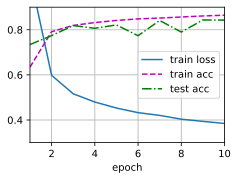

In [14]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


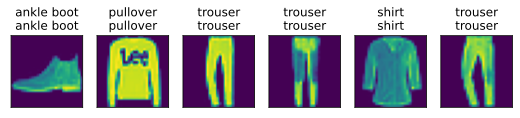

In [15]:
d2l.predict_ch3(net, test_iter)

# 📌 Summary
We saw that implementing a simple MLP is easy, even when done manually.

However, with a large number of layers, implementing MLPs from scratch can still get messy (e.g., naming and keeping track of our model’s parameters).

# **4.3 Concise Implementation of Multilayer Perceptrons**

In [16]:
import torch
from torch import nn
from d2l import torch as d2l

# 🛵 4.3.1. Model

In [17]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

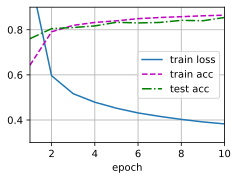

In [18]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 🌗 Summary
Using high-level APIs, we can implement MLPs much more concisely.

For the same classification problem, the implementation of an MLP is the same as that of softmax regression except for additional hidden layers with activation functions.

# **4.4 Model Selection, Underfitting, and Overfitting**

**Polynomial Regression**

In [19]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

**Generating Dataset**

In [20]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [21]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.0225],
         [-0.4830]]),
 tensor([[ 1.0000e+00,  2.2470e-02,  2.5245e-04,  1.8909e-06,  1.0622e-08,
           4.7736e-11,  1.7877e-13,  5.7387e-16,  1.6119e-18,  4.0243e-21,
           9.0428e-24,  1.8472e-26,  3.4589e-29,  5.9786e-32,  9.5958e-35,
           1.4375e-37,  2.0188e-40,  2.6625e-43,  0.0000e+00,  0.0000e+00],
         [ 1.0000e+00, -4.8296e-01,  1.1663e-01, -1.8775e-02,  2.2669e-03,
          -2.1897e-04,  1.7626e-05, -1.2161e-06,  7.3415e-08, -3.9396e-09,
           1.9027e-10, -8.3539e-12,  3.3622e-13, -1.2491e-14,  4.3090e-16,
          -1.3874e-17,  4.1879e-19, -1.1898e-20,  3.1923e-22, -8.1144e-24]]),
 tensor([4.9668, 3.9250]))

**Training and Testing the Model**

In [22]:
def evaluate_loss(net, data_iter, loss):  #save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [23]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

**Third-Order Polynomial Function Fitting (Normal)**

weight: [[ 4.9963226  1.2782886 -3.360097   5.4312453]]


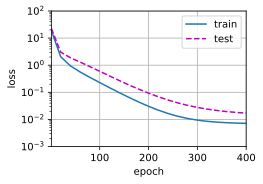

In [24]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

**Linear Function Fitting (Underfitting)**

weight: [[3.2348049 3.1180837]]


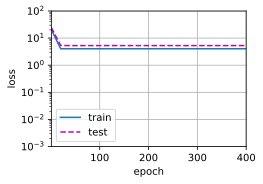

In [25]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

**Higher-Order Polynomial Function Fitting (Overfitting)**

weight: [[ 4.9916425   1.2957542  -3.2935553   5.202167   -0.34512466  1.217035
   0.06385655 -0.01864203  0.08558705 -0.05338904 -0.11188916  0.2219161
   0.06987938  0.07028077  0.0787684  -0.08602539  0.21560293 -0.15585338
   0.20558837  0.16352516]]


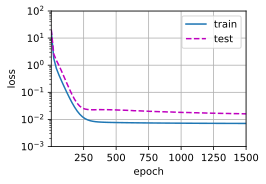

In [26]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

# 🌖 Summary
Since the generalization error cannot be estimated based on the training error, simply minimizing the training error will not necessarily mean a reduction in the generalization error. Machine learning models need to be careful to safeguard against overfitting so as to minimize the generalization error.

A validation set can be used for model selection, provided that it is not used too liberally.

Underfitting means that a model is not able to reduce the training error. When training error is much lower than validation error, there is overfitting.

We should choose an appropriately complex model and avoid using insufficient training samples.

# **Weight Decay**

# 🦛 4.5.2. High-Dimensional Linear Regression

In [27]:
#%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [28]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

# 🧋4.5.3. Implementation from Scratch

**Initializing Model Parameters**

In [29]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

**Defining  L2  Norm Penalty**

In [30]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

**Defining the Training Loop**

In [31]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # The L2 norm penalty term has been added, and broadcasting
            # makes `l2_penalty(w)` a vector whose length is `batch_size`
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', torch.norm(w).item())

**Training without Regularization**

L2 norm of w: 14.5344820022583


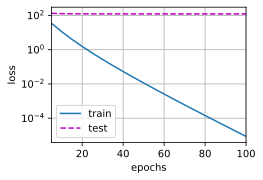

In [32]:
train(lambd=0)

**Using Weight Decay**

L2 norm of w: 0.3687783181667328


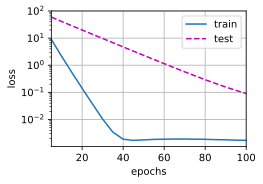

In [33]:
train(lambd=3)

# 🥥 4.5.4. Concise Implementation

In [34]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # The bias parameter has not decayed
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())

L2 norm of w: 13.925049781799316


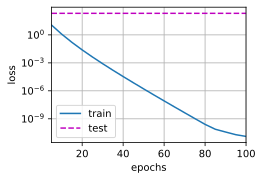

In [35]:
train_concise(0)

L2 norm of w: 0.3606264591217041


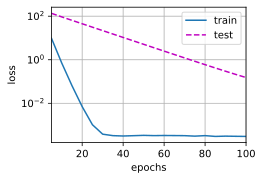

In [36]:
train_concise(3)

# 🍄 4.5.5. Summary
Regularization is a common method for dealing with overfitting. It adds a penalty term to the loss function on the training set to reduce the complexity of the learned model.

One particular choice for keeping the model simple is weight decay using an  L2  penalty. This leads to weight decay in the update steps of the learning algorithm.

The weight decay functionality is provided in optimizers from deep learning frameworks.

Different sets of parameters can have different update behaviors within the same training loop.

# **4.6 Dropout**

# 🦠 4.6.4. Implementation from Scratch

In [37]:
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # In this case, all elements are dropped out
    if dropout == 1:
        return torch.zeros_like(X)
    # In this case, all elements are kept
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [38]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  4.,  0.,  0.,  0.,  0., 14.],
        [16., 18., 20., 22.,  0.,  0.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


**Defining Model Parameters**

In [39]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

**Defining the Model**

In [40]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # Use dropout only when training the model
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # Add a dropout layer after the second fully connected layer
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

**Training and Testing**

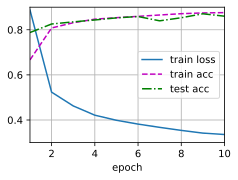

In [41]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 🎊 4.6.5. Concise Implementation

In [ ]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # Add a dropout layer after the first fully connected layer
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # Add a dropout layer after the second fully connected layer
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

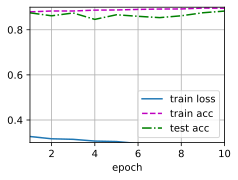

In [42]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 😱 4.6.6. Summary
Beyond controlling the number of dimensions and the size of the weight vector, dropout is yet another tool to avoid overfitting. Often they are used jointly.

Dropout replaces an activation  h  with a random variable with expected value  h .

Dropout is only used during training.

# **4.7. Forward Propagation, Backward Propagation, and Computational Graphs**

# 🍜4.7.5. Summary
Forward propagation sequentially calculates and stores intermediate variables within the computational graph defined by the neural network. It proceeds from the input to the output layer.

Backpropagation sequentially calculates and stores the gradients of intermediate variables and parameters within the neural network in the reversed order.

When training deep learning models, forward propagation and back propagation are interdependent.

Training requires significantly more memory than prediction.

# **Numerical Stability and Initialization**

# 🌋 4.8.1. Vanishing and Exploding Gradients

**Vanishing Gradients**

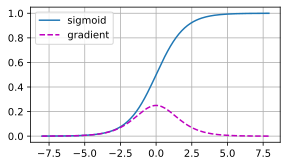

In [43]:
#%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

**Exploding Gradients**

In [44]:
M = torch.normal(0, 1, size=(4,4))
print('a single matrix \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('after multiplying 100 matrices\n', M)

a single matrix 
 tensor([[-0.0681, -0.3599,  1.1660,  0.5633],
        [ 1.0112,  2.0632,  1.4469, -1.5099],
        [ 1.0690, -0.8326,  0.7977, -1.1525],
        [-0.7058, -1.1173, -0.2093, -0.4987]])
after multiplying 100 matrices
 tensor([[ 9.4277e+24, -9.5095e+24,  2.1396e+24, -4.7416e+24],
        [-8.0259e+24,  8.0956e+24, -1.8214e+24,  4.0366e+24],
        [-2.0112e+24,  2.0287e+24, -4.5643e+23,  1.0115e+24],
        [-6.5689e+24,  6.6259e+24, -1.4908e+24,  3.3038e+24]])


# 😺 4.8.3. Summary
Vanishing and exploding gradients are common issues in deep networks. Great care in parameter initialization is required to ensure that gradients and parameters remain well controlled.

Initialization heuristics are needed to ensure that the initial gradients are neither too large nor too small.

ReLU activation functions mitigate the vanishing gradient problem. This can accelerate convergence.

Random initialization is key to ensure that symmetry is broken before optimization.

Xavier initialization suggests that, for each layer, variance of any output is not affected by the number of inputs, and variance of any gradient is not affected by the number of outputs.

# **4.9 Environment and Distribution Shift**
In many cases training and test sets do not come from the same distribution. This is called distribution shift.

The risk is the expectation of the loss over the entire population of data drawn from their true distribution. However, this entire population is usually unavailable. Empirical risk is an average loss over the training data to approximate the risk. In practice, we perform empirical risk minimization.

Under the corresponding assumptions, covariate and label shift can be detected and corrected for at test time. Failure to account for this bias can become problematic at test time.

In some cases, the environment may remember automated actions and respond in surprising ways. We must account for this possibility when building models and continue to monitor live systems, open to the possibility that our models and the environment will become entangled in unanticipated ways.

# **4.10. Predicting House Prices on Kaggle**

# 🐶 4.10.1. Downloading and Caching Datasets

In [45]:
import hashlib
import os
import tarfile
import zipfile
import requests

#save
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

In [47]:
def download(name, cache_dir=os.path.join('..', 'data')):  #save
    """Download a file inserted into DATA_HUB, return the local filename."""
    assert name in DATA_HUB, f"{name} does not exist in {DATA_HUB}."
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname  # Hit cache
    print(f'Downloading {fname} from {url}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

In [49]:
def download_extract(name, folder=None):  #save
    """Download and extract a zip/tar file."""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, 'Only zip/tar files can be extracted.'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():  #save
    """Download all files in the DATA_HUB."""
    for name in DATA_HUB:
        download(name)

# 📅 4.10.3. Accessing and Reading the Dataset

In [54]:
# If pandas is not installed, please uncomment the following line:
# !pip install pandas

#%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [53]:
DATA_HUB['kaggle_house_train'] = (  #save
    DATA_URL + 'kaggle_house_pred_train.csv',
    '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = (  #save
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

In [55]:
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

In [56]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [57]:
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [58]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

# 🩹 4.10.4. Data Preprocessing

In [59]:
# If test data were inaccessible, mean and standard deviation could be
# calculated from training data
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# After standardizing the data all means vanish, hence we can set missing
# values to 0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [60]:
# `Dummy_na=True` considers "na" (missing value) as a valid feature value, and
# creates an indicator feature for it
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

In [61]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(
    train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

# 🚩4.10.5. Training

In [62]:
loss = nn.MSELoss()
in_features = train_features.shape[1]

def get_net():
    net = nn.Sequential(nn.Linear(in_features,1))
    return net

In [63]:
def log_rmse(net, features, labels):
    # To further stabilize the value when the logarithm is taken, set the
    # value less than 1 as 1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

In [64]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # The Adam optimization algorithm is used here
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# 🥝 4.10.6.  K -Fold Cross-Validation

In [65]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [66]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
              f'valid log rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

# 🤯 4.10.7. Model Selection

fold 1, train log rmse 0.169729, valid log rmse 0.157142
fold 2, train log rmse 0.162315, valid log rmse 0.190197
fold 3, train log rmse 0.163900, valid log rmse 0.168189
fold 4, train log rmse 0.168259, valid log rmse 0.154742
fold 5, train log rmse 0.163438, valid log rmse 0.182731
5-fold validation: avg train log rmse: 0.165528, avg valid log rmse: 0.170600


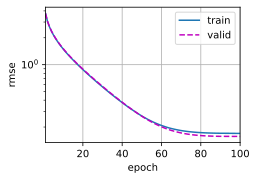

In [67]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-fold validation: avg train log rmse: {float(train_l):f}, '
      f'avg valid log rmse: {float(valid_l):f}')

# 🧪 4.10.8. Submitting Predictions on Kaggle

In [68]:
def train_and_pred(train_features, test_feature, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'train log rmse {float(train_ls[-1]):f}')
    # Apply the network to the test set
    preds = net(test_features).detach().numpy()
    # Reformat it to export to Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

train log rmse 0.162679


ImportError: ignored

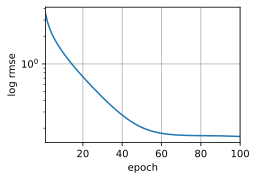

In [71]:
train_and_pred(train_features, test_features, train_labels, test_data,num_epochs, lr, weight_decay, batch_size)

# 🌎 4.10.9. Summary
Real data often contain a mix of different data types and need to be preprocessed.

Rescaling real-valued data to zero mean and unit variance is a good default. So is replacing missing values with their mean.

Transforming categorical features into indicator features allows us to treat them like one-hot vectors.

We can use  K -fold cross-validation to select the model and adjust the hyperparameters.

Logarithms are useful for relative errors.